In [133]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 100)

In [134]:
#track_record = pd.read_csv('experiments/all_series_final_solution.csv')
#track_record = pd.read_csv('experiments/just_game_id.csv')
track_record = pd.read_csv('artefacts/aggregatorDatetime_min_games1_do_baselineFalse_20231202053916/result.csv')
#track_record = pd.read_csv('artefacts/aggregatorGameId_min_games0_do_baselineTrue_20231201230422/result.csv')
track_record.head(20)

,0,1,2,3,4,5
0,2738735,0.480377,5,False,True,2019-04-27
1,2738739,0.000000,5,False,True,2019-04-27
2,2738740,0.185077,5,False,True,2019-04-27
3,2740879,0.125237,4,True,True,2019-04-28
4,2740882,0.075408,5,True,True,2019-04-28
5,2740885,0.034980,5,True,True,2019-04-28
6,2740886,0.755292,5,True,True,2019-04-28
7,2740887,0.045728,5,True,True,2019-04-28
8,2740905,0.046768,5,True,True,2019-04-28
9,2740906,0.058850,5,True,True,2019-04-28


In [136]:
track_record.columns = ['GameId',	'return',	'n_bets', 'time_limit_flag', 'is_valid_solution', 'Datetime']
track_record

,GameId,return,n_bets,time_limit_flag,is_valid_solution,Datetime
0,2738735,0.480377,5,False,True,2019-04-27
1,2738739,0.000000,5,False,True,2019-04-27
2,2738740,0.185077,5,False,True,2019-04-27
3,2740879,0.125237,4,True,True,2019-04-28
4,2740882,0.075408,5,True,True,2019-04-28
...,...,...,...,...,...,...
1327,5924760,0.506040,5,False,True,2022-11-10
1328,5924763,0.313994,5,False,True,2022-11-10
1329,5924764,0.021086,5,False,True,2022-11-10
1330,5924765,0.248516,5,False,True,2022-11-10


In [137]:
print(track_record.shape)
track_record = track_record[track_record.is_valid_solution]
print(track_record[track_record.is_valid_solution].shape)


(1332, 6)
(1239, 6)


In [138]:
track_record.head(20)

,GameId,return,n_bets,time_limit_flag,is_valid_solution,Datetime
0,2738735,0.480377,5,False,True,2019-04-27
1,2738739,0.000000,5,False,True,2019-04-27
2,2738740,0.185077,5,False,True,2019-04-27
3,2740879,0.125237,4,True,True,2019-04-28
4,2740882,0.075408,5,True,True,2019-04-28
5,2740885,0.034980,5,True,True,2019-04-28
6,2740886,0.755292,5,True,True,2019-04-28
7,2740887,0.045728,5,True,True,2019-04-28
8,2740905,0.046768,5,True,True,2019-04-28
9,2740906,0.058850,5,True,True,2019-04-28


In [139]:
def process_results(track_record, aggregator):
    
    count_col = track_record.groupby(aggregator, sort=False).size().reset_index(drop=True)
    #is_valid_solution = track_record.groupby(aggregator, sort=False)['is_valid_solution'].any().reset_index(drop=True)
    track_record = track_record.groupby('Datetime', sort=False)[['return', 'n_bets']].sum().reset_index()
    track_record['count'] = count_col
    #track_record['is_valid_solution'] = is_valid_solution

    return track_record

In [140]:
track_record = process_results(track_record, 'Datetime')
track_record

,Datetime,return,n_bets,count
0,2019-04-27,0.665453,15,3
1,2019-04-28,1.142264,34,7
2,2019-05-02,1.384192,25,5
3,2019-05-04,1.045380,10,2
4,2019-05-05,0.957346,38,8
...,...,...,...,...
284,2022-11-03,1.413580,10,2
285,2022-11-05,1.328331,25,5
286,2022-11-06,1.162436,20,4
287,2022-11-09,1.292047,25,5


In [141]:
# count_col = track_record.groupby(['Datetime']).count().reset_index()['GameId']
# is_valid_solution = track_record.groupby(['Datetime']).any().reset_index()['is_valid_solution']
# track_record = track_record.groupby(['Datetime'])[['return', 'n_bets']].sum().reset_index()
# track_record['count'] = count_col
# track_record['is_valid_solution'] = is_valid_solution
# track_record

In [142]:
print(track_record['return'].corr(track_record['count'], method='kendall'))
print(track_record['return'].corr(track_record['n_bets'],))

-0.06305692177875531
0.0033748791631391254


In [143]:
track_record.groupby(track_record.Datetime.apply(lambda x: x[:4])).count()

,Datetime,return,n_bets,count
Datetime,,,,
2019,64,64,64,64
2020,55,55,55,55
2021,99,99,99,99
2022,71,71,71,71


In [ ]:
track_record.groupby(['count', 'return']).size()

count  return
1      0.000     27
       1.600      1
       1.875      1
       2.480      1
       2.750      1
       3.740      1
       4.200      1
       4.270      1
       5.380      1
       7.190      1
       9.500      1
       11.875     1
       12.160     1
       12.890     1
       13.200     1
       15.740     1
       26.500     1
       28.000     1
dtype: int64

In [144]:
track_record.groupby('count')['return'].median()

count
2    1.078904
3    1.049970
4    1.042634
5    1.032180
6    1.013446
7    1.056106
8    1.026522
Name: return, dtype: float64

In [145]:
print(track_record.shape)
track_record = track_record[track_record.is_valid_solution]
print(track_record.shape)

(289, 4)


AttributeError: 'DataFrame' object has no attribute 'is_valid_solution'

In [146]:
track_record.head()

,Datetime,return,n_bets,count
0,2019-04-27,0.665453,15,3
1,2019-04-28,1.142264,34,7
2,2019-05-02,1.384192,25,5
3,2019-05-04,1.045380,10,2
4,2019-05-05,0.957346,38,8


In [147]:
def compute_stake(df):
    stake = [1]
    current_stake = 1
    percentage = 0.10
    for i in df['return']:

        preserved_stake = current_stake * (1-percentage)
        bet_stake = current_stake*percentage
        current_stake = preserved_stake + bet_stake*i

        #print(current_stake)

        stake.append(current_stake)
    
    return stake

In [149]:
stake = compute_stake(track_record)
stake

[1,
 0.9665453406282603,
 0.9802958030784766,
 1.0179580178368894,
 1.022577534673455,
 1.0182158176071272,
 1.2529256723172986,
 1.2862355489850925,
 1.325913927251298,
 1.3651504977421605,
 1.3698219918637802,
 1.3872524320326576,
 1.464863757317185,
 1.4747632200145295,
 1.5193003946451924,
 1.6889433407160213,
 1.6865861674939573,
 1.6077093944042746,
 1.519473927975002,
 1.529726191637025,
 1.5344564618293937,
 1.6972879944590349,
 1.7019807836406888,
 1.6976059560875383,
 1.6615348497283502,
 1.6333694552744418,
 1.6554400106736564,
 1.6577506781800955,
 1.718783547334574,
 1.8084406941937565,
 1.790494472187859,
 1.791897032078539,
 1.8384336629445308,
 1.9011705750860544,
 1.9020818875418,
 1.9804248027522227,
 1.9776399566451581,
 1.9752342168768944,
 1.9916600801467674,
 2.0680765550892635,
 2.142979271877651,
 2.1486629480249104,
 2.1657268537454475,
 2.09667467886205,
 2.3402196211500486,
 2.2453598285391183,
 2.252265194746954,
 2.4555692548151242,
 2.210012329333612,
 2.2

In [150]:
track_record['Datetime'] = track_record.apply(lambda x: f"{x['Datetime']}_{x['GameId']}", axis=1)

KeyError: 'GameId'

In [151]:
def build_plot_df(df, stake):
    return pd.DataFrame({'date': ['0'] + list(df.Datetime),
                        'return': [0] + list(df['return']),
                        #'count': [0] + list(df['count']),
                        #'n_bets': [0] + list(df.n_bets),
                        'stake':stake})
my_df = build_plot_df(track_record, stake)
my_df

,date,return,stake
0,0,0.000000,1.000000
1,2019-04-27,0.665453,0.966545
2,2019-04-28,1.142264,0.980296
3,2019-05-02,1.384192,1.017958
4,2019-05-04,1.045380,1.022578
...,...,...,...
285,2022-11-03,1.413580,7.558542
286,2022-11-05,1.328331,7.806712
287,2022-11-06,1.162436,7.933521
288,2022-11-09,1.292047,8.165217


In [152]:
my_df[my_df.stake == my_df.stake.max()]

,date,return,stake
289,2022-11-10,1.336482,8.439963


In [153]:
def plot_strategy(df):
    # Create a line plot
    plt.figure(figsize=(20, 6))
    plt.plot(df.date, df.stake, linestyle='-')
    plt.title('Cumulative Profits Over Time (%)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Profits')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [157]:
df_strategy = my_df.copy().iloc[1:]
df_strategy.date = pd.to_datetime(df_strategy.date)

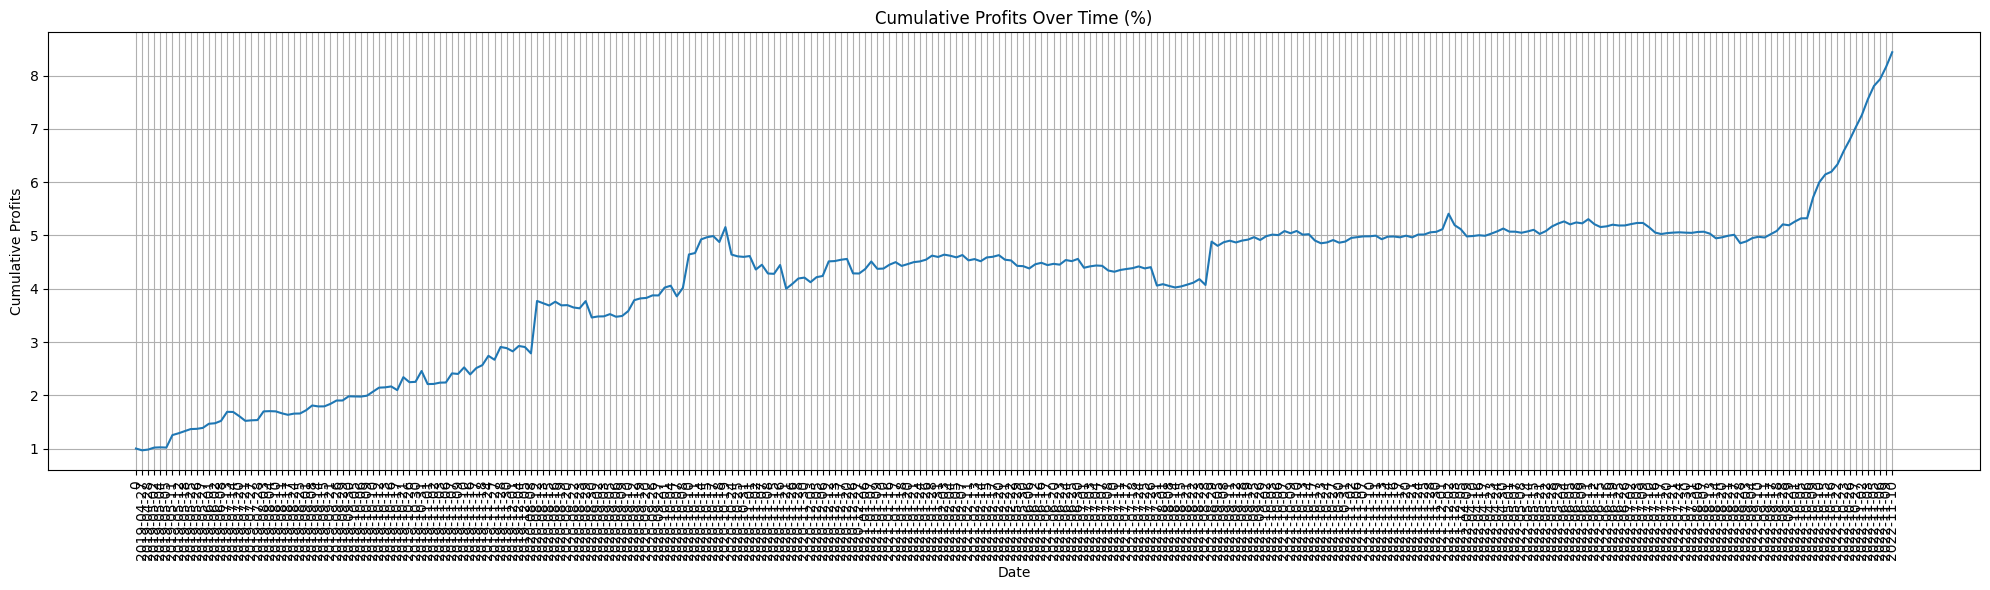

In [159]:
plot_strategy(my_df)
#plot_strategy(df_strategy)

In [19]:
track_record.loc[:, 'year'] = track_record['datetime'].apply(lambda x: x[:4])
track_record

C:\Users\Marcos Augusto\AppData\Local\Temp\ipykernel_14456\3960167630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_record.loc[:, 'year'] = track_record['datetime'].apply(lambda x: x[:4])


,datetime,return,n_bets,count,is_valid_solution,year
0,2019-04-27,0.665453,15,3,True,2019
1,2019-04-28,1.148989,34,7,True,2019
3,2019-05-02,1.383096,25,5,True,2019
4,2019-05-04,1.045380,10,2,True,2019
5,2019-05-05,0.966362,38,8,True,2019
...,...,...,...,...,...,...
308,2022-11-03,1.413580,10,2,True,2022
309,2022-11-05,1.332791,25,5,True,2022
310,2022-11-06,1.161109,20,4,True,2022
311,2022-11-09,1.286985,25,5,True,2022


## Break by year

Year: 2019


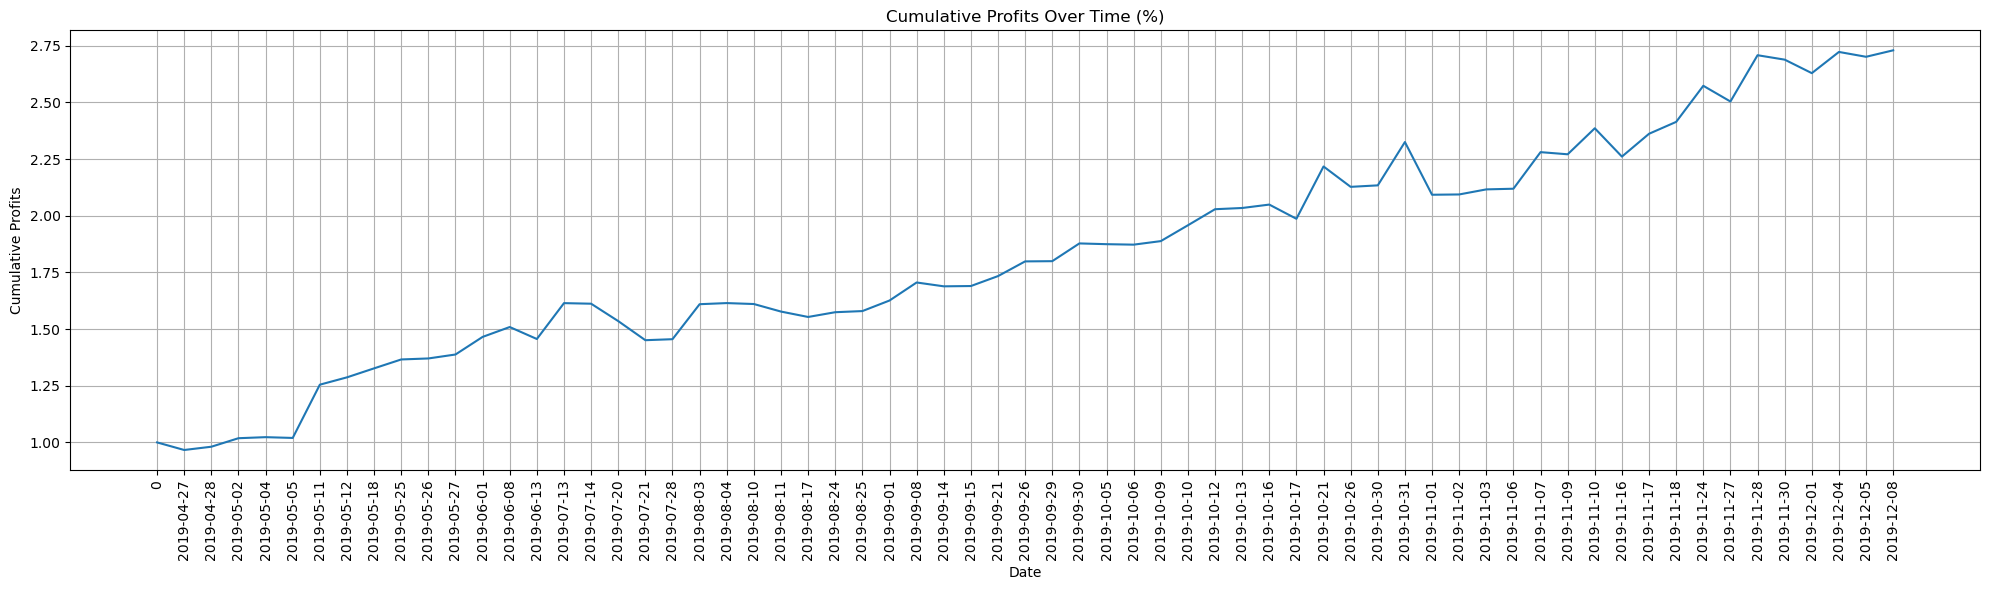

Year: 2020


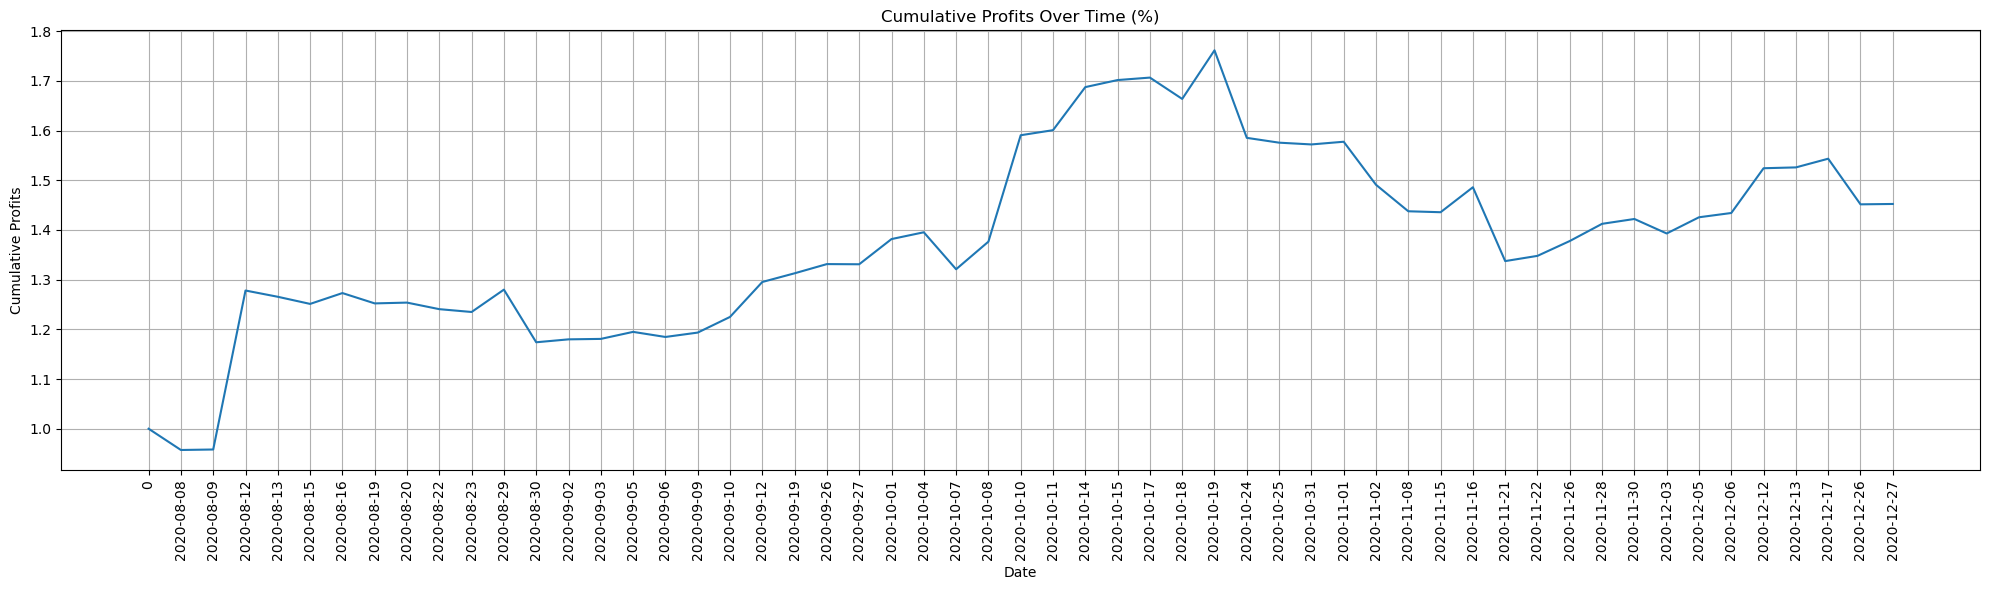

Year: 2021


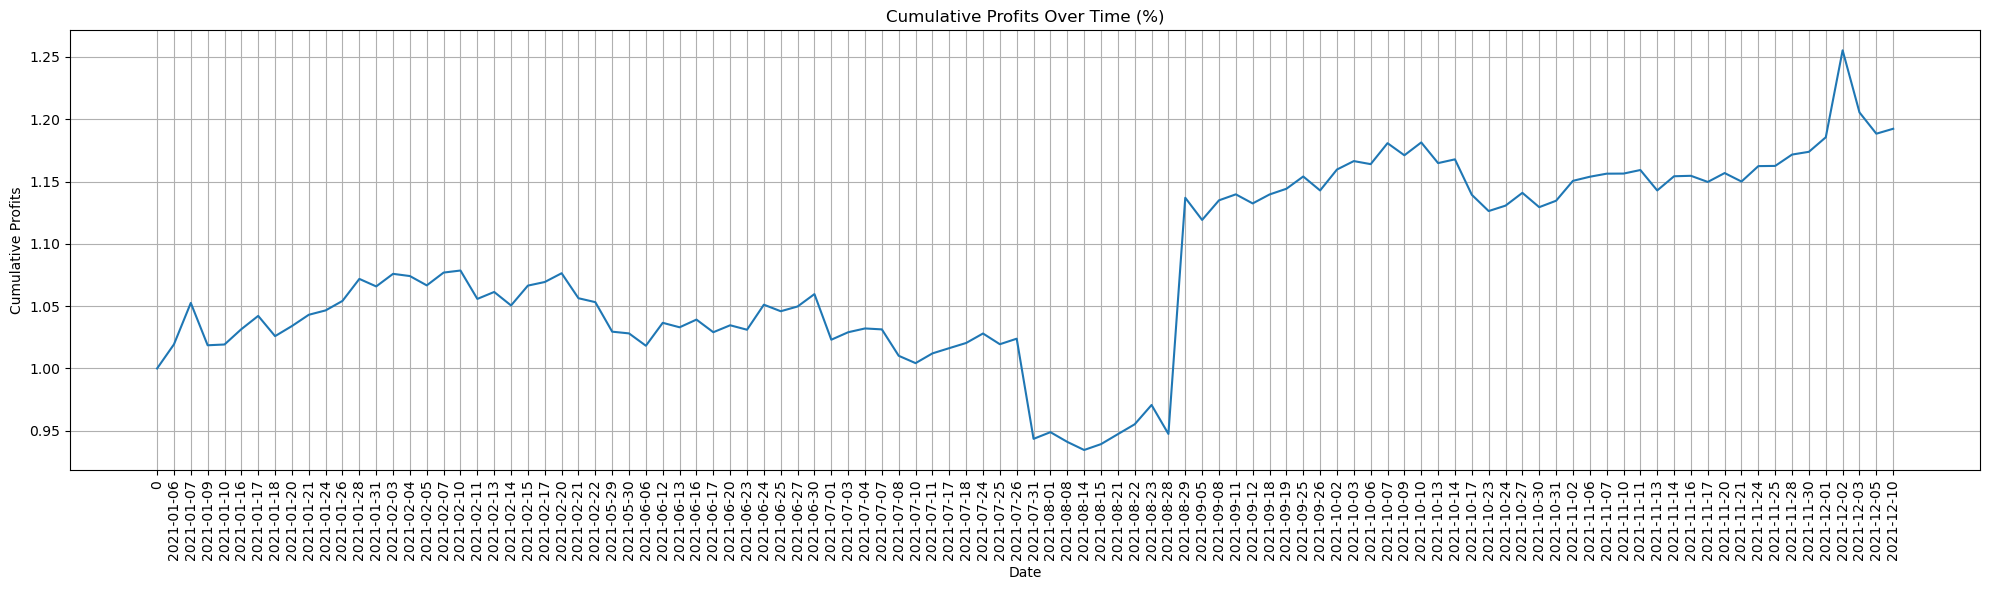

Year: 2022


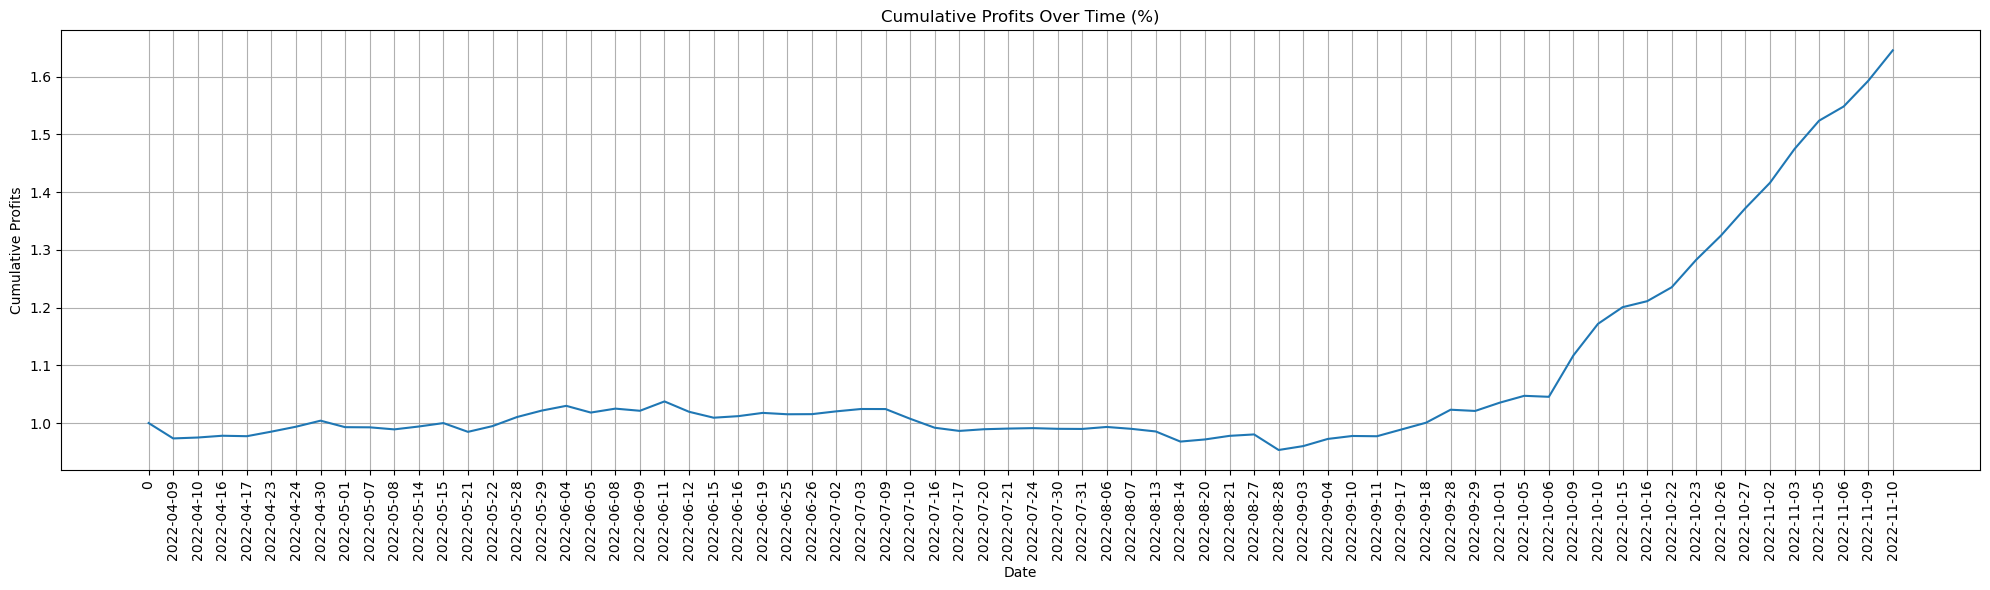

In [20]:
for year in track_record.year.unique():
    print(f"Year: {year}")
    df = track_record[track_record['year']==year]
    stake = compute_stake(df)
    my_df = build_plot_df(df, stake)
    plot_strategy(df)

## Baseline + strategy

In [125]:
df_strategy = pd.read_csv("artefacts/aggregatorDatetime_min_games1_do_baselineFalse_20231201163246/result_plot.csv").iloc[1:]
df_strategy = pd.read_csv("artefacts/aggregatorDatetime_min_games1_do_baselineFalse_20231202053916/result_plot.csv").iloc[1:]
df_baseline1 = pd.read_csv("artefacts/aggregatorGameId_min_games0_do_baselineTrue_20231201231551/result_plot.csv")
df_baseline1['date'] = df_baseline1.date.apply(lambda x: x[:10])
df_baseline1 = df_baseline1.groupby('date', sort=False).last().reset_index().iloc[1:]

df_baseline2 = pd.read_csv("artefacts/aggregatorGameId_min_games0_do_baselineTrue_20231202014701/result_plot.csv")
df_baseline2['date'] = df_baseline2.date.apply(lambda x: x[:10])
df_baseline2 = df_baseline2.groupby('date', sort=False).last().reset_index().iloc[1:]


#df_strategy = pd.read_csv("artefacts/aggregatorDatetime_min_games1_do_baselineFalse_20231201163246/result_plot.csv")
df_baseline2

,date,return,stake
1,2019-04-27,0.000,0.729000
2,2019-04-28,0.000,1.879420
3,2019-05-01,0.000,1.109779
4,2019-05-02,0.000,0.655313
5,2019-05-04,1.525,0.620745
...,...,...,...
97,2019-12-01,0.000,0.000001
98,2019-12-02,0.000,0.000001
99,2019-12-05,0.000,0.000003
100,2019-12-04,0.000,0.000004


In [126]:
df_strategy.date = pd.to_datetime(df_strategy.date)
df_baseline1.date = pd.to_datetime(df_baseline1.date)
df_baseline2.date = pd.to_datetime(df_baseline2.date)

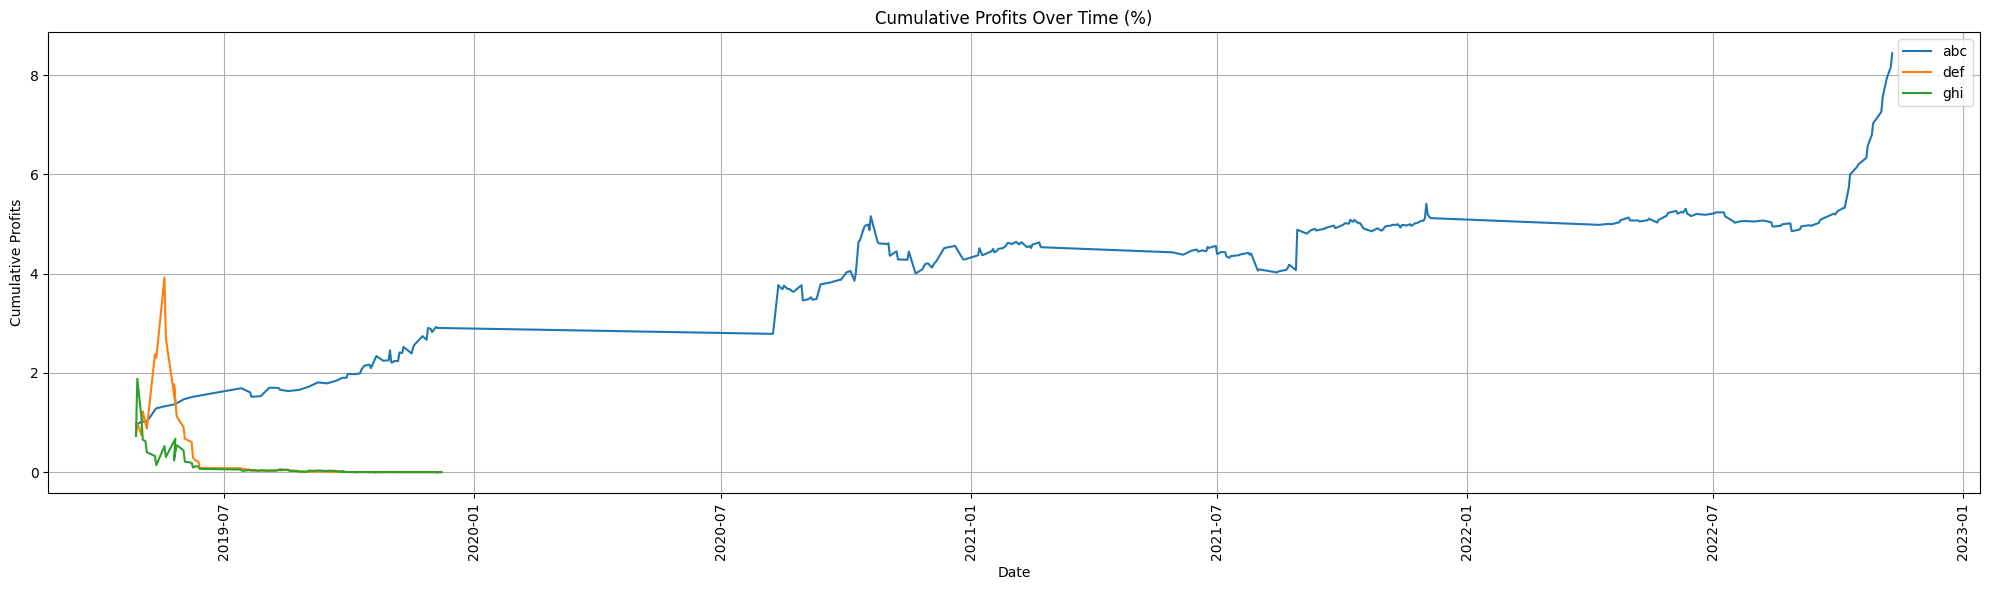

In [127]:
plt.figure(figsize=(20, 6))
plt.plot(df_strategy.date, df_strategy.stake, label='abc')
plt.plot(df_baseline1.date, df_baseline1.stake, label='def')
plt.plot(df_baseline2.date, df_baseline2.stake, label='ghi')
plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.xticks(rotation=90)
plt.title('Cumulative Profits Over Time (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [163]:
import os
current_directory = os.getcwd()

# List all files in the current directory
os.listdir(f"{current_directory}/artefacts")

['aggregatorDatetime_min_games1_do_baselineFalse_20231201163246',
 'aggregatorDatetime_min_games1_do_baselineFalse_20231202024415',
 'aggregatorDatetime_min_games1_do_baselineFalse_20231202053916',
 'aggregatorGameId_min_games0_do_baselineTrue_20231202215726',
 'aggregatorGameId_min_games0_do_baselineTrue_20231202220322',
 'aggregatorGameId_min_games0_do_baselineTrue_20231202220626',
 'aggregatorGameId_min_games0_do_baselineTrue_20231202220918',
 'aggregatorGameId_min_games0_do_baselineTrue_20231202221330',
 'aggregatorGameId_min_games0_do_baselineTrue_20231202221543',
 'aggregatorGameId_min_games0_do_baselineTrue_20231202222007',
 'aggregatorGameId_min_games0_do_baselineTrue_20231202222248',
 'aggregatorGameId_min_games0_do_baselineTrue_20231202223049',
 'aggregatorGameId_min_games0_do_baselineTrue_20231202223238']

aggregatorGameId_min_games0_do_baselineTrue_20231202215726
aggregatorGameId_min_games0_do_baselineTrue_20231202220322
aggregatorGameId_min_games0_do_baselineTrue_20231202220626
aggregatorGameId_min_games0_do_baselineTrue_20231202220918
aggregatorGameId_min_games0_do_baselineTrue_20231202221330
aggregatorGameId_min_games0_do_baselineTrue_20231202221543
aggregatorGameId_min_games0_do_baselineTrue_20231202222007
aggregatorGameId_min_games0_do_baselineTrue_20231202222248
aggregatorGameId_min_games0_do_baselineTrue_20231202223049
aggregatorGameId_min_games0_do_baselineTrue_20231202223238


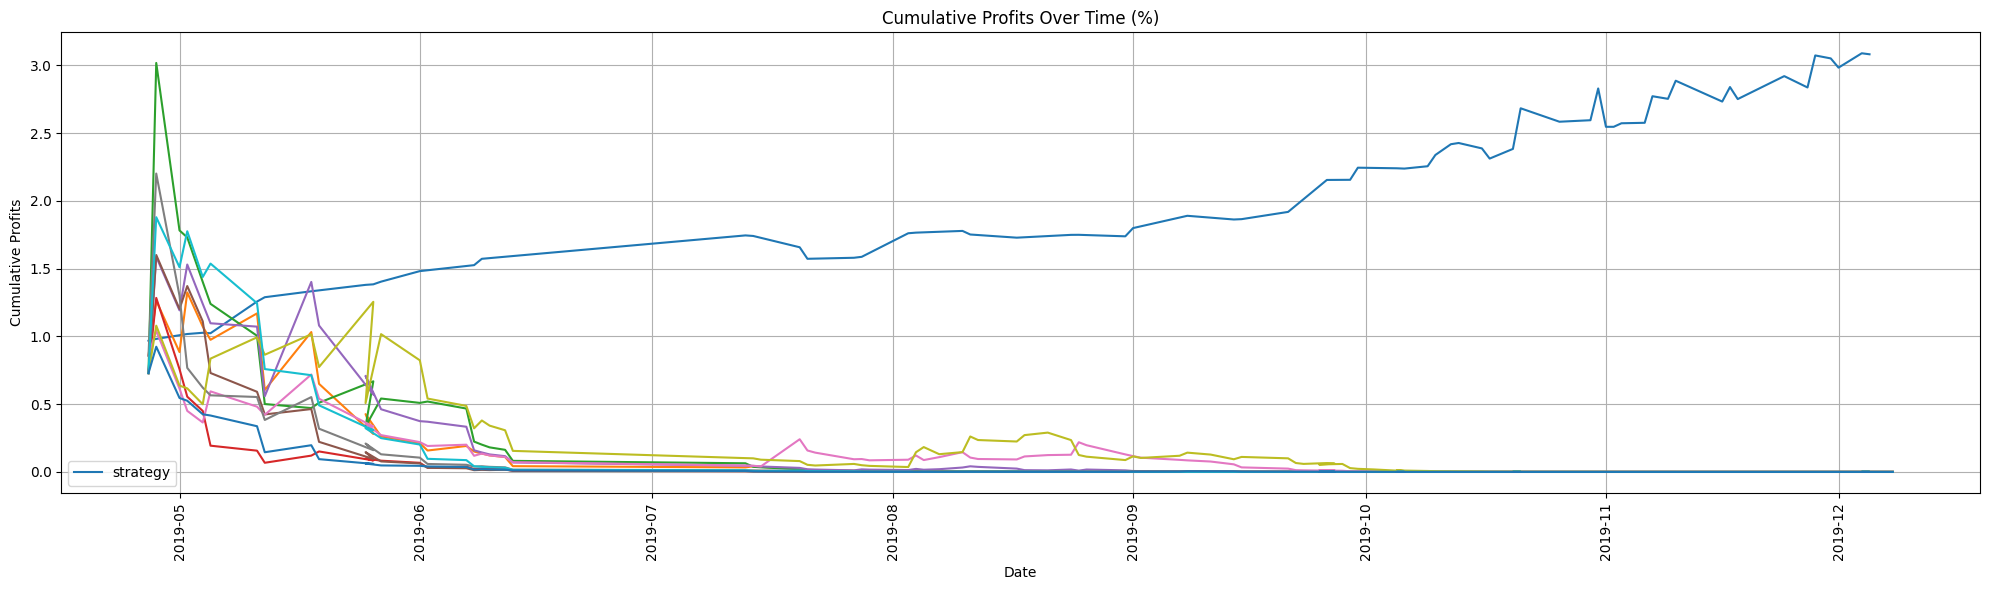

In [175]:
df_strategy = pd.read_csv("artefacts/aggregatorDatetime_min_games1_do_baselineFalse_20231201163246/result_plot.csv").iloc[1:]
df_strategy.date = pd.to_datetime(df_strategy.date)

plt.figure(figsize=(20, 6))
plt.plot(df_strategy.date, df_strategy.stake, label='strategy')

current_directory = os.getcwd()
artefacts_path = f"{current_directory}\\artefacts"
for file in os.listdir(artefacts_path):
    if 'baselineTrue' in file:
        df_baseline = pd.read_csv(f"{artefacts_path}\\{file}\\result_plot.csv")
        df_baseline['date'] = df_baseline.date.apply(lambda x: x[:10])
        df_baseline = df_baseline.groupby('date', sort=False).last().reset_index().iloc[1:]
        df_baseline.date = pd.to_datetime(df_baseline.date)
        plt.plot(df_baseline.date, df_baseline.stake)

        print(file)

plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.xticks(rotation=90)
plt.title('Cumulative Profits Over Time (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

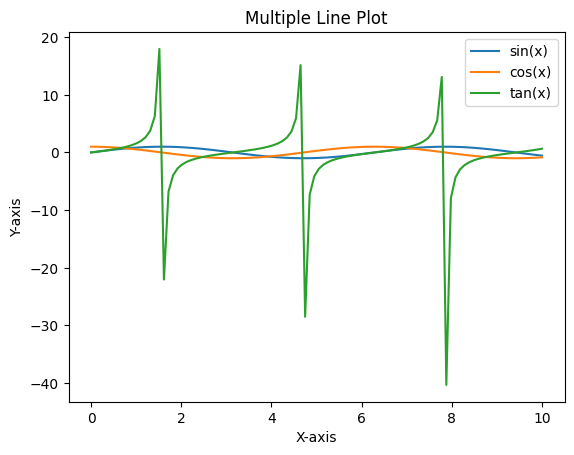

In [56]:
import numpy as np
# Generate sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Plot the lines
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.plot(x, y3, label='tan(x)')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Plot')
plt.legend()

# Show the plot
plt.show()


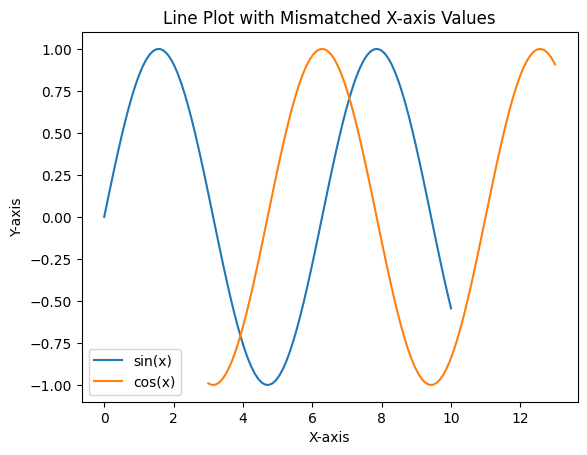

In [74]:
# Generate sample data with mismatched x-axis values
x1 = np.linspace(0, 10, 100)
y1 = np.sin(x1)

x2 = np.linspace(3, 13, 100)  # Mismatched x-axis values
y2 = np.cos(x2)

# Plot the lines with mismatched x-axis values
plt.plot(x1, y1, label='sin(x)')
plt.plot(x2, y2, label='cos(x)')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot with Mismatched X-axis Values')
plt.legend()

# Show the plot
plt.show()